In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from IPython.display import HTML
from matplotlib import animation
import matplotlib as mpl

mpl.rcParams['animation.embed_limit'] = 100_000_000  # just in case


In [2]:
# Parametrize catenoid
def catenoid(u, v):
    X = np.cosh(v) * np.cos(u)
    Y = np.cosh(v) * np.sin(u)
    Z = v
    return X, Y, Z

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(-1.5, 1.5, 100)
u, v = np.meshgrid(u, v)

X, Y, Z = catenoid(u, v)

# Compute derivatives
def partial_derivatives(X, Y, Z):
    Xu = np.gradient(X, axis=1)
    Xv = np.gradient(X, axis=0)
    Yu = np.gradient(Y, axis=1)
    Yv = np.gradient(Y, axis=0)
    Zu = np.gradient(Z, axis=1)
    Zv = np.gradient(Z, axis=0)
    return Xu, Xv, Yu, Yv, Zu, Zv

Xu, Xv, Yu, Yv, Zu, Zv = partial_derivatives(X, Y, Z)

# Tangent vectors
ru = np.stack([Xu, Yu, Zu], axis=-1)
rv = np.stack([Xv, Yv, Zv], axis=-1)

# Normal vector
n = np.cross(ru, rv)
n_norm = np.linalg.norm(n, axis=-1, keepdims=True)
n_unit = n / n_norm

# First fundamental form: E, F, G
E = np.sum(ru * ru, axis=-1)
F = np.sum(ru * rv, axis=-1)
G = np.sum(rv * rv, axis=-1)

# Second partials
Xuu = np.gradient(Xu, axis=1)
Xuv = np.gradient(Xu, axis=0)
Xvv = np.gradient(Xv, axis=0)

Yuu = np.gradient(Yu, axis=1)
Yuv = np.gradient(Yu, axis=0)
Yvv = np.gradient(Yv, axis=0)

Zuu = np.gradient(Zu, axis=1)
Zuv = np.gradient(Zu, axis=0)
Zvv = np.gradient(Zv, axis=0)

ruu = np.stack([Xuu, Yuu, Zuu], axis=-1)
ruv = np.stack([Xuv, Yuv, Zuv], axis=-1)
rvv = np.stack([Xvv, Yvv, Zvv], axis=-1)

# Second fundamental form: L, M, N
L = np.sum(n_unit * ruu, axis=-1)
M = np.sum(n_unit * ruv, axis=-1)
N = np.sum(n_unit * rvv, axis=-1)

# Gaussian and Mean curvature
K = (L*N - M**2) / (E*G - F**2)
H = (E*N - 2*F*M + G*L) / (2*(E*G - F**2))


/tmp/ipython-input-1187442468.py:7: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


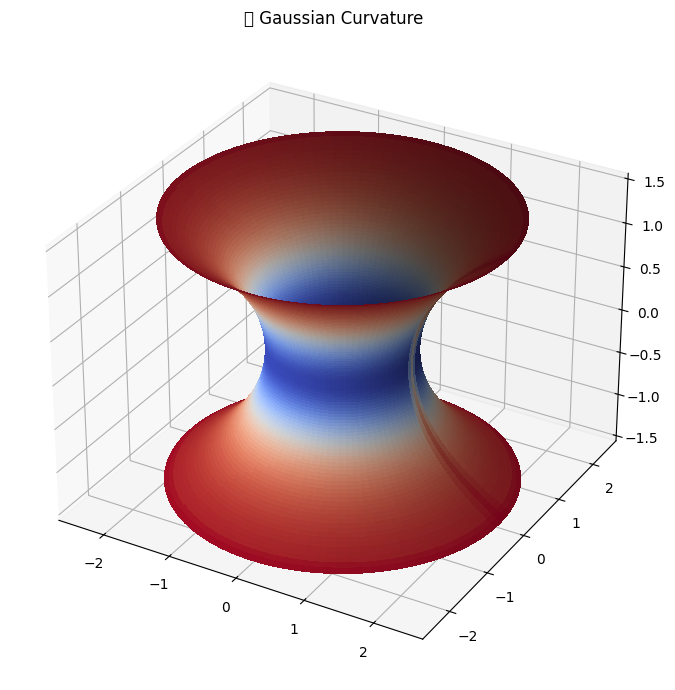

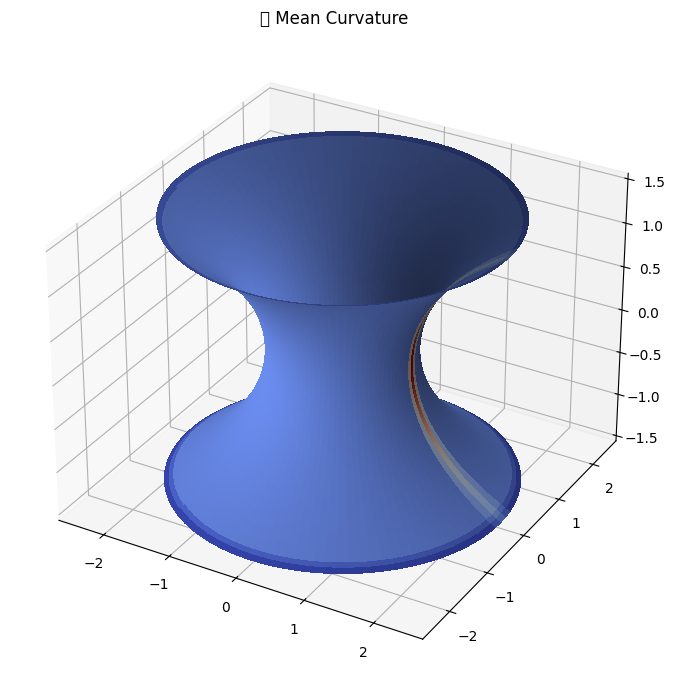

In [3]:
def plot_curvature_surface(X, Y, Z, C, title="Curvature Shading", cmap=cm.coolwarm):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    norm = colors.Normalize(vmin=np.min(C), vmax=np.max(C))
    ax.plot_surface(X, Y, Z, facecolors=cmap(norm(C)), rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

plot_curvature_surface(X, Y, Z, K, title="🌈 Gaussian Curvature")
plot_curvature_surface(X, Y, Z, H, title="🌈 Mean Curvature")


/tmp/ipython-input-1922762210.py:12: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


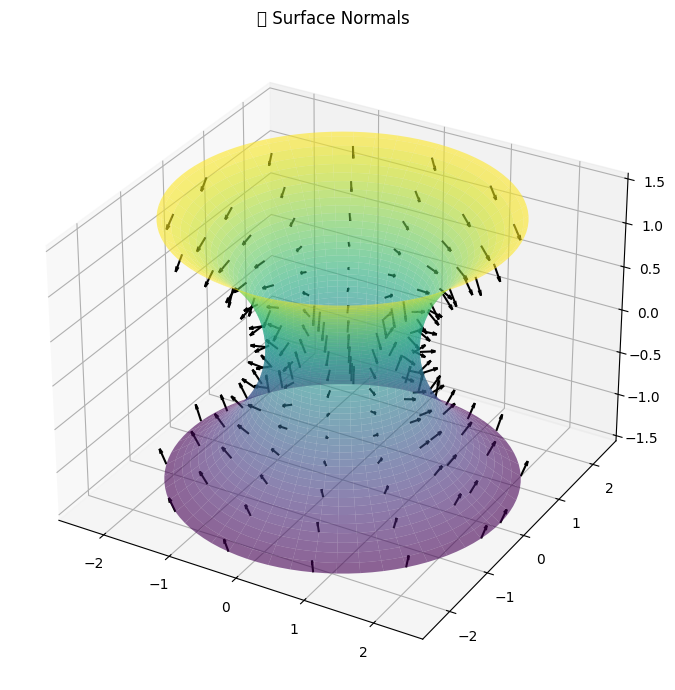

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6, cmap=cm.viridis)

# Sample every 8th point for clarity
skip = 8
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], Z[::skip, ::skip],
          n_unit[::skip, ::skip, 0], n_unit[::skip, ::skip, 1], n_unit[::skip, ::skip, 2],
          length=0.2, normalize=True, color='black')

ax.set_title("🧭 Surface Normals")
plt.tight_layout()
plt.show()
